In [1]:
import numpy as np, matplotlib.pyplot as plt, itertools, networkx as nx
from sympy import *

# Exercise 1
Calculate the derivatives of the following functions

$f(t) = t^{4}+3t^{3}-12t^{2}+t-6$

$g(x) = sin(x) - cos(x)$

$\theta(\alpha) = e^{\alpha}+\alpha \ln(\alpha)$

$x(t) = sin^{2}(t) - cos(t)$

$\frac{d f}{d t}  = 4t^{3} + 9t^{2} -24t + 1$

$\frac{d g}{d x} = cos(x) + sin(x)$

$\frac{d \theta}{d \alpha} = e^{\alpha} + ln(\alpha) + 1$

$\frac{d x}{d t} = 2sin(t)cos(t) + sin(t)$

In [2]:
# solving using sympy

t, x, alpha = symbols('t x alpha')

ft = t**4 + 3*t**3 - 12*t**2 + t - 6
gx = sin(x) - cos(x)
ta = exp(alpha) + alpha*log(alpha)
xt = sin(t)**2 - cos(t)

df_dt = diff(ft, t)
dg_dx = diff(gx, x)
dt_da = diff(ta, alpha)
dx_dt = diff(xt, t)

print(f'df_dt = {df_dt}')
print(f'dg_dx = {dg_dx}')
print(f'dt_da = {dt_da}')
print(f'dx_dt = {dx_dt}')

df_dt = 4*t**3 + 9*t**2 - 24*t + 1
dg_dx = sin(x) + cos(x)
dt_da = exp(alpha) + log(alpha) + 1
dx_dt = 2*sin(t)*cos(t) + sin(t)


In [3]:
# converting the solutions back into python functions
df_dt = lambdify(t, df_dt)
dg_dx = lambdify(x, dg_dx)
dt_da = lambdify(alpha, dt_da)
dx_dt = lambdify(t, dx_dt)

# to do more things like evaluate them
print(dg_dx(0))

1.0


# Exercise 2
Take the second derivative of each function

$\frac{d^{2} f}{d t^{2}}  = 12t^{2} + 18t -24$

$\frac{d^{2} g}{d x^{2}} = cos(x) - sin(x)$

$\frac{d^{2} \theta}{d \alpha^{2}} = e^{\alpha} + \frac{1}{\alpha}$

$\frac{d^{2} x}{d t^{2}} = cos(t) + 2cos(2t)$

In [4]:
# taking the second derivatives using sympy

d2f_dt2 = diff(diff(ft, t), t)
d2g_dx2 = diff(diff(gx, x), x)
d2t_da2 = diff(diff(ta, alpha), alpha)
d2x_dt2 = diff(diff(xt, t), t)

print(f'd2f_dt2 = {d2f_dt2}')
print(f'd2g_dx2 = {d2g_dx2}')
print(f'd2t_da2 = {d2t_da2}')
print(f'd2x_dt2 = {d2x_dt2}')

d2f_dt2 = 12*t**2 + 18*t - 24
d2g_dx2 = -sin(x) + cos(x)
d2t_da2 = exp(alpha) + 1/alpha
d2x_dt2 = -2*sin(t)**2 + 2*cos(t)**2 + cos(t)


# Exercise 3
More derivatives

$\frac{d}{d t}[sin(t^{2}) - cos(t^{2})] = 2tcos(t^{2})+ 2tsin(t^{2})$

$\frac{d}{d \alpha}[e^{3\alpha}+3\alpha ln(3\alpha)] = 3e^{3\alpha} + 3ln(3\alpha) + 3$

$\frac{d}{d t}[sin^{2}(t^{2}) - cos(t^{2})] = 4tcos(t^{2})sin(t^{2}) + 2tsin(t^{2})$

In [5]:
gt = sin(t**2) - cos(t**2)
ta = exp(3*alpha) + 3*alpha*log(3*alpha)
xt = sin(t**2)**2 - cos(t**2)

dg_dt = diff(gt, t)
dt_da = diff(ta, alpha)
dx_dt = diff(xt, t)

print(f'dg_dt = {dg_dt}')
print(f'dt_da = {dt_da}')
print(f'dx_dt = {dx_dt}')

dg_dt = 2*t*sin(t**2) + 2*t*cos(t**2)
dt_da = 3*exp(3*alpha) + 3*log(3*alpha) + 3
dx_dt = 4*t*sin(t**2)*cos(t**2) + 2*t*sin(t**2)


# Exercise 3
Prove the sum rule (fairly easy), the product rule (easy if you know the trick), and the
chain rule (fairly easy)

** Look to [M. Bivert](https://tales.mbivert.com/ttm/cm/L02E04.pdf) for more in depth analytical solutions.

### A derivative:
$\frac{d f(t)}{dt} = \lim\limits_{\Delta t \to 0} \frac{\Delta f}{\Delta t} =
\lim\limits_{\Delta t \to 0} \frac{f(t+\Delta t) - f(t)}{\Delta t}$

### The sum rule:
$\frac{d(f+g)}{dt} = \frac{d(f)}{dt} + \frac{d(g)}{dt}$

### The proof:

$\frac{d f(t)}{dt} = \lim\limits_{\Delta t \to 0} \frac{f(t+\Delta t) - f(t)}{\Delta t}$

$\frac{d g(t)}{dt} = \lim\limits_{\Delta t \to 0} \frac{g(t+\Delta t) - g(t)}{\Delta t}$

$\frac{d(f+g)}{dt} = \lim\limits_{\Delta t \to 0} \frac{f(t+\Delta t) + g(t+\Delta t) - f(t) - g(t)}{\Delta t}$

Assume all limits exist and our functions are differentiable:

$\lim\limits_{\Delta t \to 0} \frac{f(t+\Delta t) + g(t+\Delta t)- f(t) - g(t)}{\Delta t} = \lim\limits_{\Delta t \to 0}\frac{f(t+\Delta t) - f(t)}{\Delta t} + \lim\limits_{\Delta t \to 0} \frac{g(t+\Delta t) - g(t)}{\Delta t}$

$\frac{d f(t)}{dt} + \frac{d g(t)}{dt} = \frac{d(f+g)}{dt}$

### The product rule:
$\frac{d(fg)}{dt} = g(t)\frac{d(f)}{dt} + f(t)\frac{d(g)}{dt}$

### The proof:
$\frac{d(fg)}{dt} = \lim\limits_{\Delta t \to 0} \frac{ fg(t+\Delta t) - fg(t) }{\Delta t}$

$= \lim\limits_{\Delta t \to 0}  \frac{f(t+\Delta t)g(t+\Delta t) - f(t)g(t) }{\Delta t}$

$= \lim\limits_{\Delta t \to 0}  \frac{f(t+\Delta t)g(t+\Delta t) - f(t)g(t) - f(t+\Delta t)g(t) + f(t+\Delta t)g(t)}{\Delta t}$

$= \lim\limits_{\Delta t \to 0} \frac{f(t+\Delta t)[g(t+\Delta t) - g(t)] + g(t)[f(t+\Delta t) - f(t)]}{\Delta t}$

same assumption as above:

$= \lim\limits_{\Delta t \to 0} f(t+\Delta t)\frac{g(t+\Delta t) - g(t)}{\Delta t} + g(t)\lim\limits_{\Delta t \to 0} \frac{f(t+\Delta t) - f(t)}{\Delta t}$

$= \lim\limits_{\Delta t \to 0} f(t+\Delta t) \lim\limits_{\Delta t \to 0}\frac{g(t+\Delta t) - g(t)}{\Delta t} + g(t)\lim\limits_{\Delta t \to 0} \frac{f(t+\Delta t) - f(t)}{\Delta t}$

$= f(t)\frac{d(g)}{dt} + g(t)\frac{d(f)}{dt} = \frac{d(fg)}{dt}$

### The chain rule:

$\frac{df}{dt} = \frac{df}{dt}\frac{dg}{dt}$ where $f(t) = f(g(t))$

### The proof:

$ \frac{df}{dt} = \lim\limits_{\Delta t \to 0} \frac{f(g(t+\Delta t)) - f(g(t))}{\Delta t}$

$= \lim\limits_{\Delta t \to 0} \frac{f(g(t+\Delta t)) - f(g(t))}{g(t+\Delta t) - g(t)} \times \frac{g(t+\Delta t) - g(t)}{\Delta t} $

$= \lim\limits_{\Delta t \to 0} \frac{f(g(t+\Delta t)) - f(g(t))}{g(t+\Delta t) - g(t)} \times \lim\limits_{\Delta t \to 0}\frac{g(t+\Delta t) - g(t)}{\Delta t} $

$= \frac{d}{dt}f(g(t)) \times \frac{dg}{dt} = \frac{df}{dt}\frac{dg}{dt}$



# Exercise 5:
Prove each of the following:

$\frac{d}{dt}sin(t) = cos(t)$

$\frac{d}{dt}cos(t) = -sin(t)$

$\frac{d}{dt}e^{t} = e^{t}$

$\frac{d}{dt}ln(t) =\frac{1}{t}$

### Prove $\frac{d}{dt}sin(t) = cos(t)$

$\frac{d}{dt}sin(t) = \lim\limits_{\Delta t \to 0} \frac{sin(t+ \Delta t)}{\Delta t}$

$ sin(t+\Delta t)= sin(t)cos(\Delta t) - cos(t)sin(\Delta t)$

$\implies \frac{d}{dt}sin(t) = \lim\limits_{\Delta t \to 0} \frac{sin(t)cos(\Delta t) - cos(t)sin(\Delta t) - sin(t)}{\Delta t}$

$= \lim\limits_{\Delta t \to 0} \frac{sin(t)[cos(\Delta t)-1] - cos(t)sin(\Delta t)}{\Delta t}$

$=\lim\limits_{\Delta t \to 0} \frac{sin(t)[cos(\Delta t)-1]}{\Delta t} + \lim\limits_{\Delta t \to 0} \frac{cos(t)sin(\Delta t)}{\Delta t}$

$= 0 + cos(t) = \frac{d}{dt}sin(t)$

### Prove $\frac{d}{dt}cos(t) = -sin(t)$

$\frac{d}{dt}cos(t) = \lim\limits_{\Delta t \to 0} \frac{cos(t+\Delta t)}{\Delta t}$

$ sin(t+\Delta t)= cos(t)cos(\Delta t) - sin(t)sin(\Delta t)$

$\implies \frac{d}{dt}cos(t) = \lim\limits_{\Delta t \to 0} \frac{cos(t)cos(\Delta t) - sin(t)sin(\Delta t) - cos(t)}{\Delta t}$

$= \lim\limits_{\Delta t \to 0} \frac{cos(t)[cos(\Delta t)-1] - sin(t)sin(\Delta t)}{\Delta t}$

$ = \lim\limits_{\Delta t \to 0} \frac{cos(t)[cos(\Delta t)-1]}{\Delta t} - \lim\limits_{\Delta t \to 0} \frac{sin(t)sin(\Delta t)}{\Delta t}$

$= 0 - sin(t) = \frac{d}{dt}cos(t) $

### Prove $\frac{d}{dt}e^{t} = e^{t}$

$\frac{d}{dt}e^{t} = \lim\limits_{\Delta t \to 0} \frac{e^{t+\Delta t} - e^{t}}{\Delta t}$

$= \lim\limits_{\Delta t \to 0} \frac{e^{t}\cdot e^{\Delta t} - e^{t}}{\Delta t}$

$= e^{t}\lim\limits_{\Delta t \to 0} \frac{e^{\Delta t} - 1}{\Delta t}$

$= e^{t} = \frac{d}{dt}e^{t}$


### Prove $\frac{d}{dt}ln(t) =\frac{1}{t}$

$\frac{d}{dt}ln(t) = \lim\limits_{\Delta t \to 0} \frac{ln(t+\Delta t) - ln(t)}{\Delta t}$

$= \lim\limits_{\Delta t \to 0} \frac{ln(\frac{t+\Delta t}{t})}{\Delta t}$

$=  \lim\limits_{\Delta t \to 0} \frac{ln(1 + \frac{\Delta t}{t})}{\Delta t}$

Let $u = \frac{\Delta t}{t}$

$\implies \frac{d}{dt}ln(t) = \lim\limits_{u \to 0} \frac{ln(1 + u)}{ut}$

$= \frac{1}{t}\lim\limits_{u \to 0} \frac{ln(1 + u)}{u}$

$ = \frac{1}{t}\cdot 1 = \frac{1}{t} = \frac{d}{dt}ln(t)$

# Exercise 6
How long does it take for the oscillating particle to go through one full cycle of motion?

One full cycle of motion is defined as the time it takes to rotate around the circle once. We move at a speed of w cycles per minute -- $x(t) = cos(wt)$ -- so the time it takes to rotate is given by $T = \frac{2\pi}{w}$. Within the context of the unit circle, with a radius of 1, $w=1 \implies T = 2\pi$

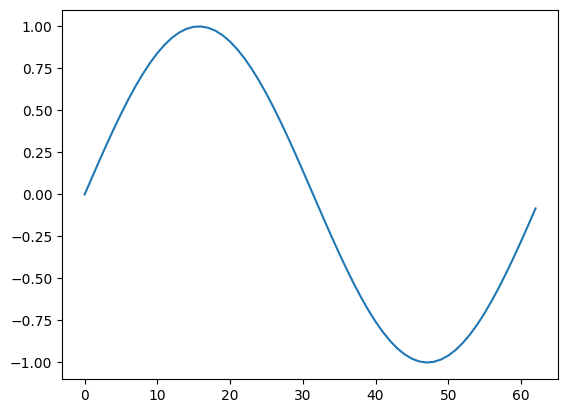

In [6]:
# position is given by x(t) = sine(wt)

T = np.arange(0, 2*np.pi, 0.1)

w = 1

plt.plot([np.sin(w*t) for t in T]);

# Exercise 7
Show that the position and velocity vectors are orthogonal

$v_{x} = -Rwsin(wt)$

$v_{y} = Rwcos(wt)$

$a_{x} = -Rw^{2}cos(wt)$

$a_{y} = -Rs^{2}sin(wt)$

$\vec{v} \perp \vec{a} \iff \vec{v}\cdot\vec{a} = 0$

$\vec{v}\cdot\vec{a} = -Rwsin(wt) \cdot -Rw^{2}cos(wt) + Rwcos(wt) \cdot -Rs^{2}sin(wt) = 0$

In [7]:
R = 1
w = 1
t = 0

v = [(-1)*R*w*np.sin(w*t), R*w*np.cos(w*t)]
a = [(-1)*R*w*np.cos(w*t), R*w*np.sin(w*t)]

print(np.dot(v,a))

0.0


# Exercise 8
Calculate the velocity, speed, and accleration for each of the following positions. Plot

$\vec{r} = (cos(wt), e^{wt})$

$\vec{r} = (cos(wt - \phi),sin(wt - \phi))$

$\vec{r} = (ccos^{3}(wt), csin^{3}(t))$

$\vec{r} = (c(t-sin(t)), c(1-cos(t)))$

$\vec{r} = (cos(wt), e^{wt})$

$\dot{\vec{r}} = (-wsin(wt), we^{wt})$

$\ddot{\vec{r}} = (-w^{2}cos(wt), w^{2}e^{wt})$

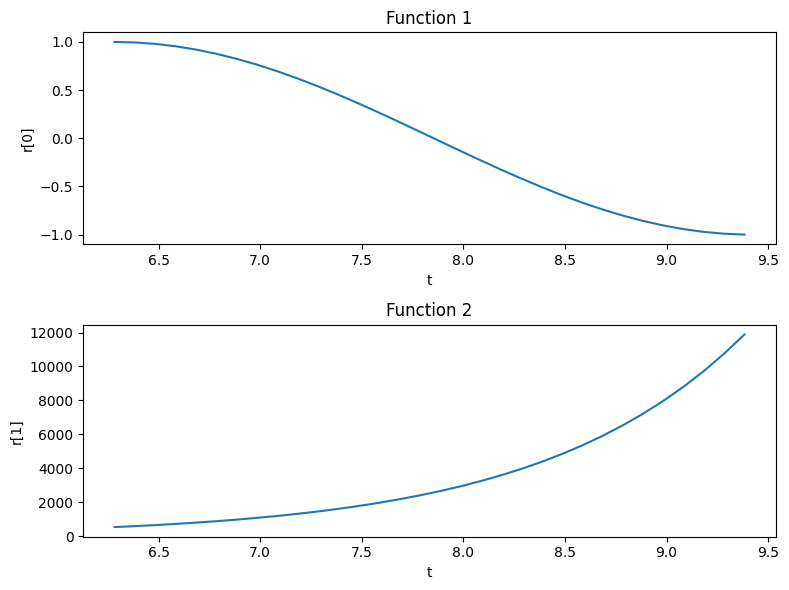

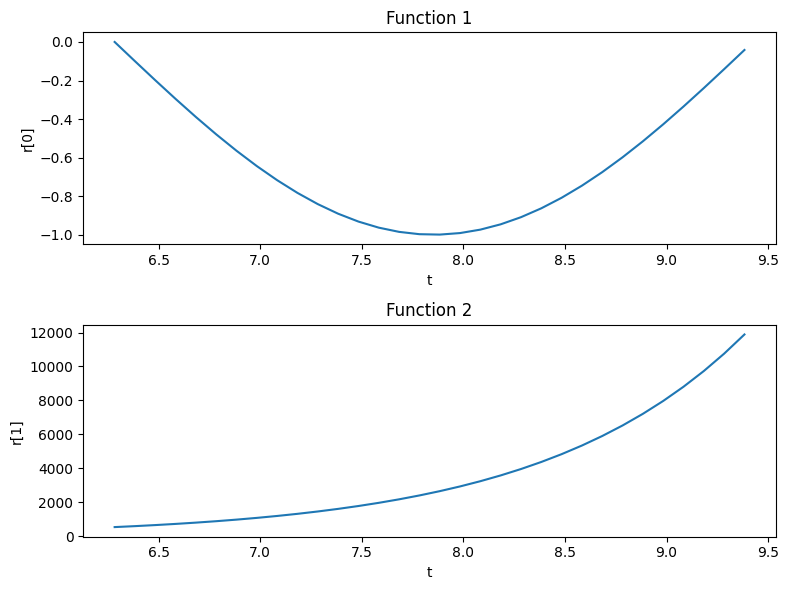

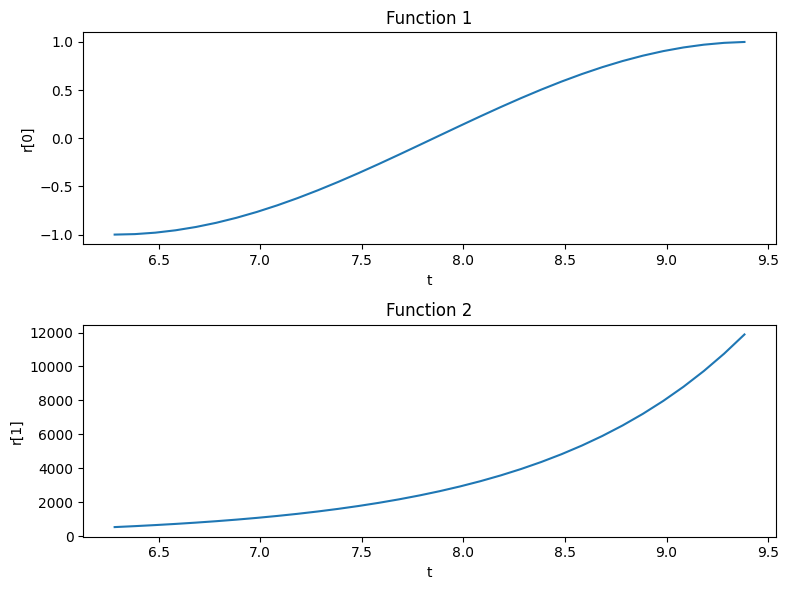

In [8]:
w = 1

# Define the symbol
t = symbols('t')

# Define the vector function
r = [cos(w*t), exp(w*t)]

# Define the derivatives
rd = [diff(r[i],t) for i in range(len(r))]
rdd = [diff(r[i],t, t) for i in range(len(r))]

def plot_vec_func(vec_func, time_values):
    fig, axes = plt.subplots(len(vec_func), 1, figsize=(8, 6))

    for i in range(len(vec_func)):
        func = lambdify(t, vec_func[i], modules=['numpy'])
        y_values = func(time_values)
        axes[i].plot(time_values, y_values)
        axes[i].set_title(f'Function {i+1}')
        axes[i].set_xlabel('t')
        axes[i].set_ylabel(f'r[{i}]')

    plt.tight_layout()
    plt.show()

# Time values for the plot
time_values = np.arange(2*np.pi, 3*np.pi, 0.1)

# Call the function with the original vector function 'r'
plot_vec_func(r, time_values)
plot_vec_func(rd, time_values)
plot_vec_func(rdd, time_values)


$\vec{r} = (cos(wt - \phi),sin(wt - \phi))$

$\dot{\vec{r}} = (wsin(ϕ−tw), wcos(ϕ−tw))$

$\ddot{\vec{r}} = (−w^{2}cos(ϕ−tw), w^{2}sin(ϕ−tw))$

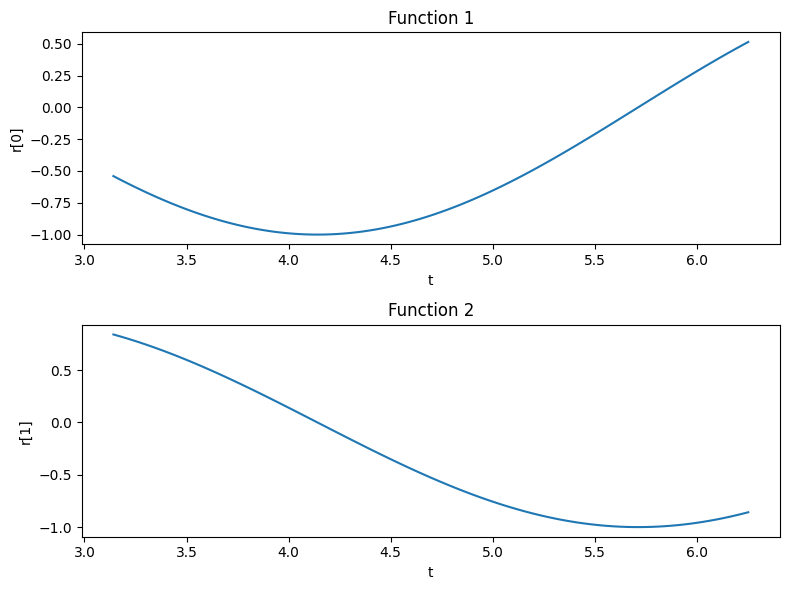

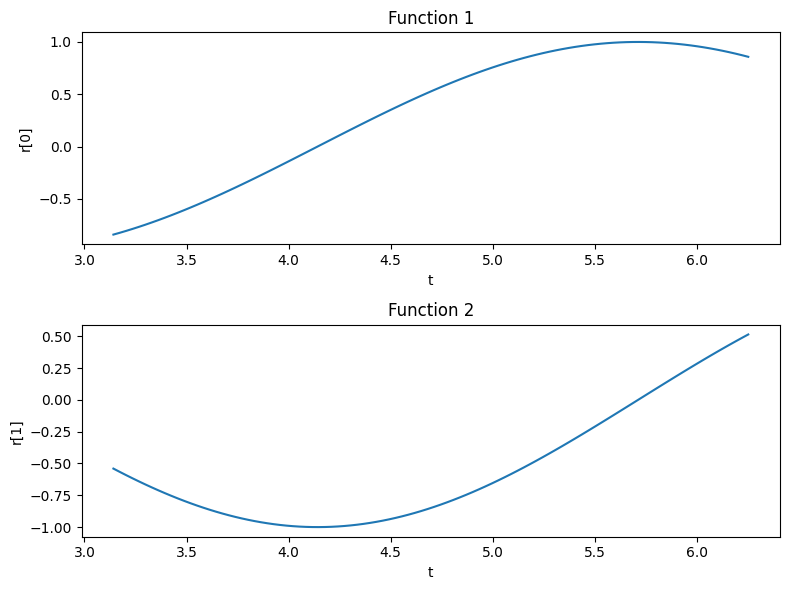

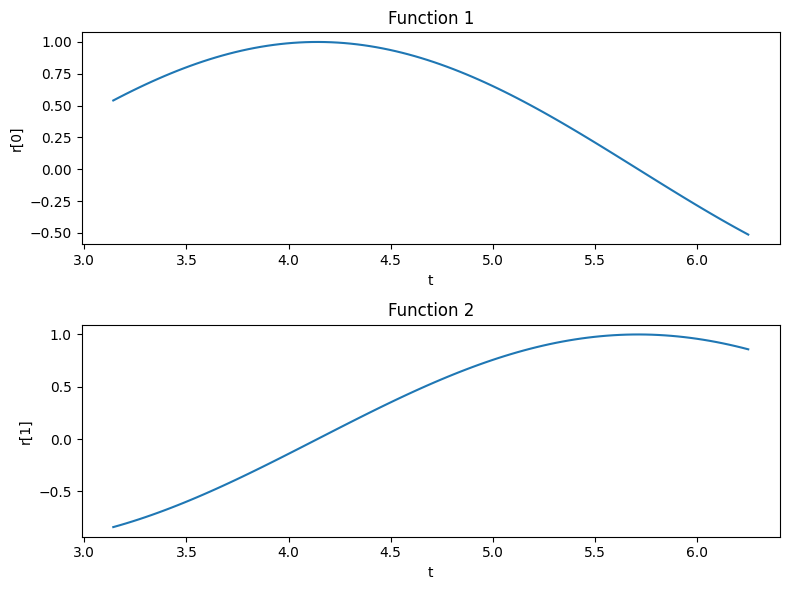

In [9]:
t = symbols('t')

phi = 1
w = 1

r = [cos(w*t - phi), sin(w*t - phi)]
rd = [diff(f, t) for f in r]
rdd = [diff(f, t, t) for f in r]

for vec in [r, rd, rdd]:
    plot_vec_func(vec, np.arange(1,2,0.01)*np.pi)

$\vec{r} = (ccos^{3}(wt), csin^{3}(t))$

$\dot{\vec{r}} = (-3sin(t)cos(t)^{2}, 3sin(t)^{2}cos(t))$

$\ddot{\vec{r}} = (3(2sin(t)^{2} - cos(t)^{2})cos(t), 3(-sin(t)^{2} + 2cos(t)^{2})sin(t))$

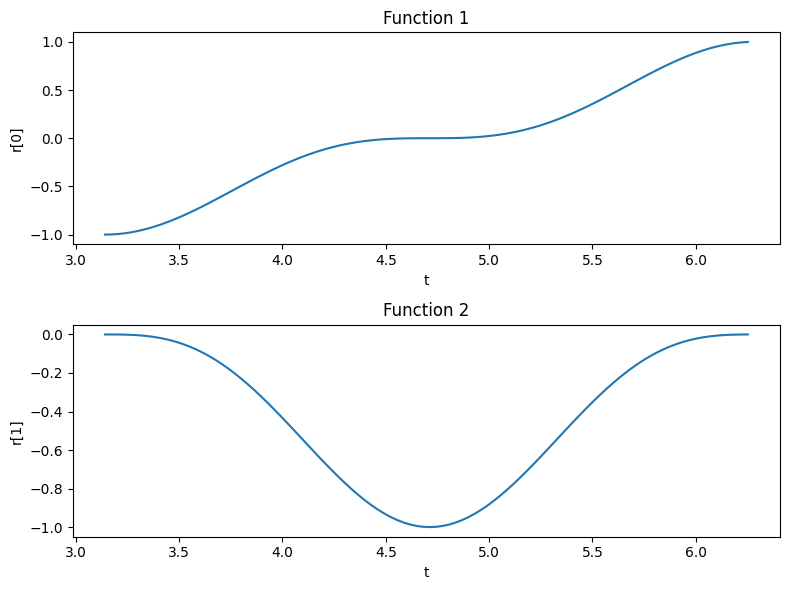

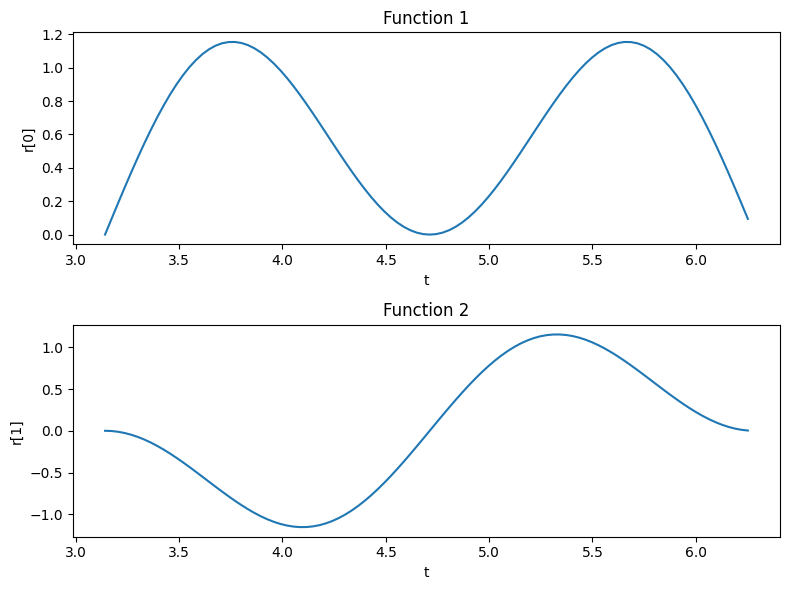

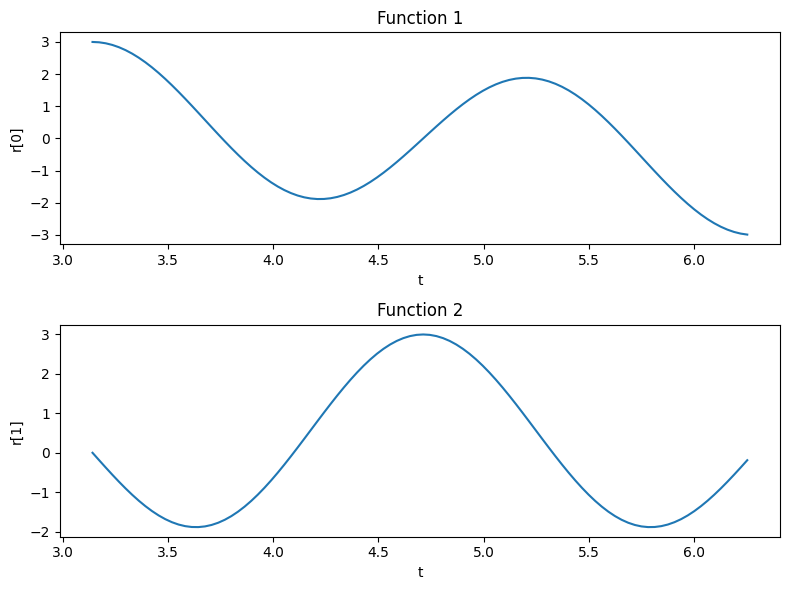

In [10]:
c, w = 1, 1

r = [c*cos(w*t)**3, c*sin(t)**3]
rd = [diff(f, t) for f in r]
rdd = [diff(f, t, t) for f in r]

for vec in [r, rd, rdd]:
    plot_vec_func(vec, np.arange(1,2,0.01)*np.pi)

$\vec{r} = (c(t-sin(t)), c(1-cos(t)))$

$\dot{\vec{r}} = (1 - cos(t), sin(t))$

$\ddot{\vec{r}} = (sin(t), cos(t))$

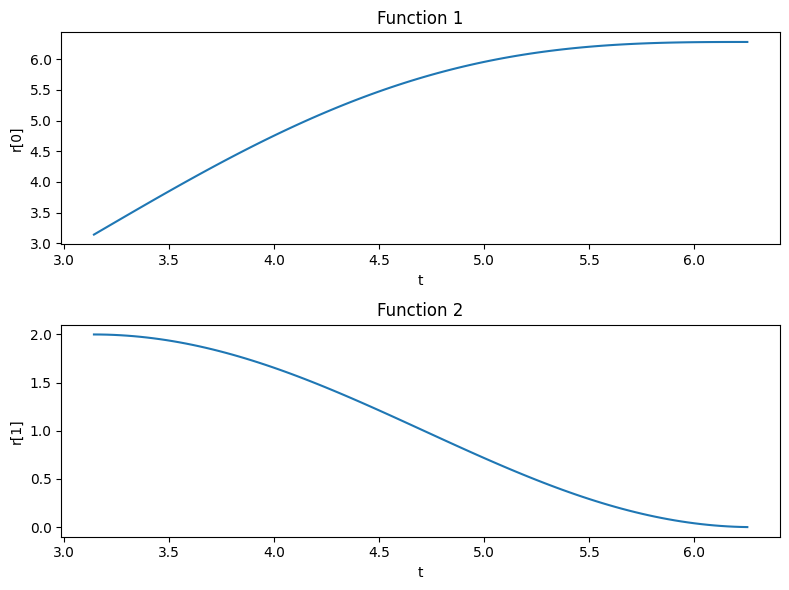

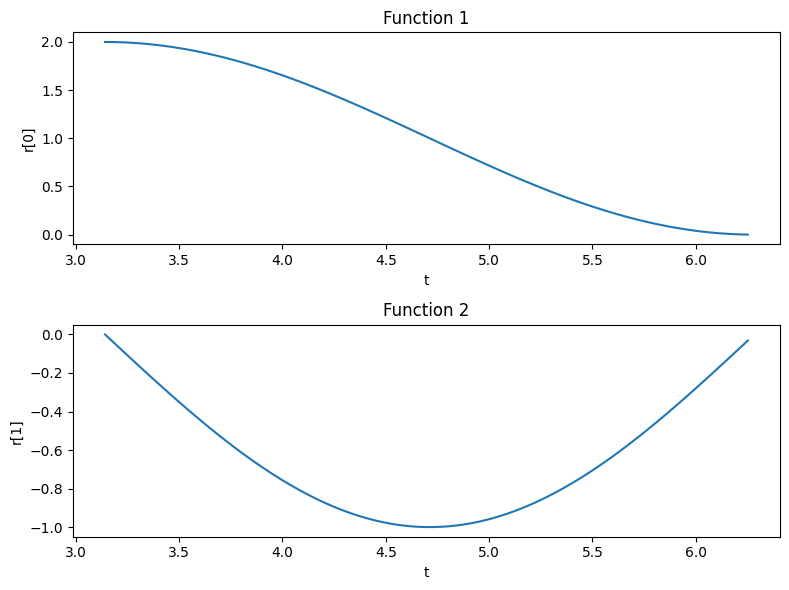

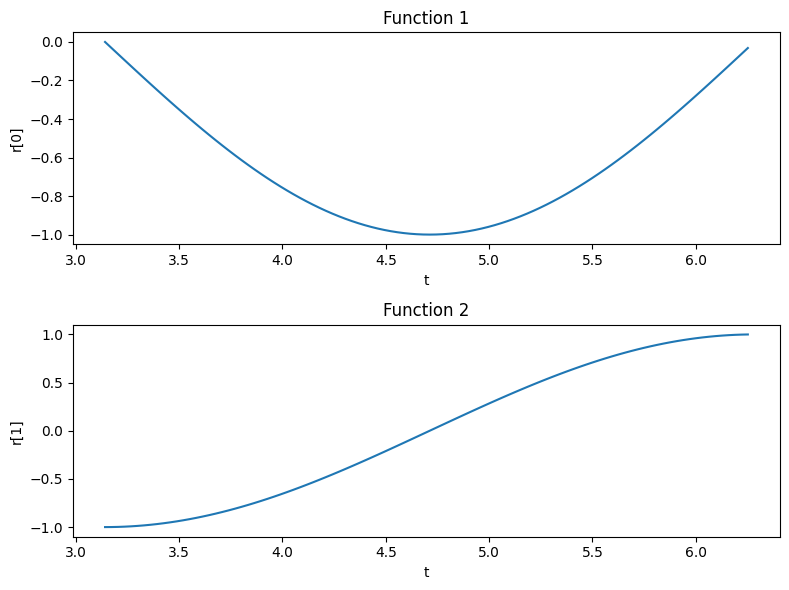

In [11]:
r = [c*(t-sin(t)), c*(1-cos(t))]
rd = [diff(f, t) for f in r]
rdd = [diff(f, t, t) for f in r]

for vec in [r, rd, rdd]:
    plot_vec_func(vec, np.arange(1,2,0.01)*np.pi)